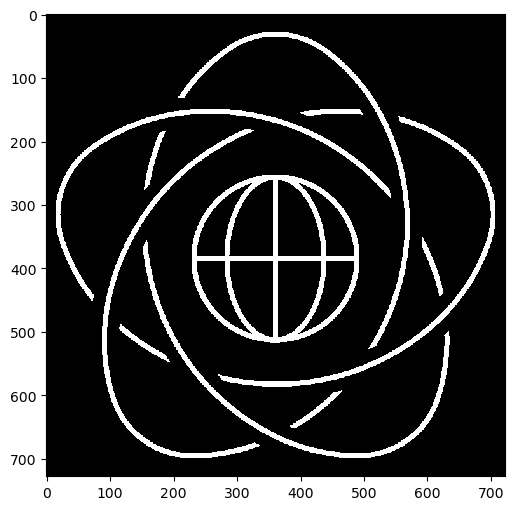

In [20]:
import skimage.io # scikit-image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
image = skimage.io.imread("img/mini_logo.png")
image = (image[:,:,0].astype(np.int32) * 2) - 1 # Black and white so just grab one RGB channel
fig, axes = plt.subplots(figsize=(10,6))
axes.imshow(image, cmap=cm.gray, aspect="equal", interpolation="none", vmin=-1, vmax=1)

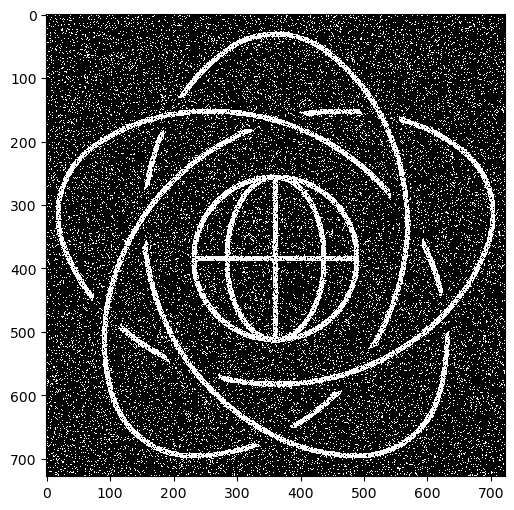

In [23]:
q = 0.9
noise = np.random.random(size = image.size).reshape(image.shape) > q
noisy = np.array(image)
noisy[noise] = -noisy[noise]
fig, axes = plt.subplots(figsize=(10,6))
axes.imshow(noisy, cmap=cm.gray, aspect="equal", interpolation="none", vmin=-1, vmax=1)

In [21]:
def IsingDeNoise(noisy, q, burnin = 50000, loops = 500000):
    h = 0.5 * np.log(q / (1-q))
    gg = IsingGridVaryingField(noisy.shape[0], noisy.shape[1], h*noisy, 2)
    gg.grid = np.array(noisy)
    
    # Burn-in
    for _ in range(burnin):
        gg.gibbs_move()
    
    # Sample
    avg = np.zeros_like(noisy).astype(np.float64)
    for _ in range(loops):
        gg.gibbs_move()
        avg += gg.grid
    return avg / loops

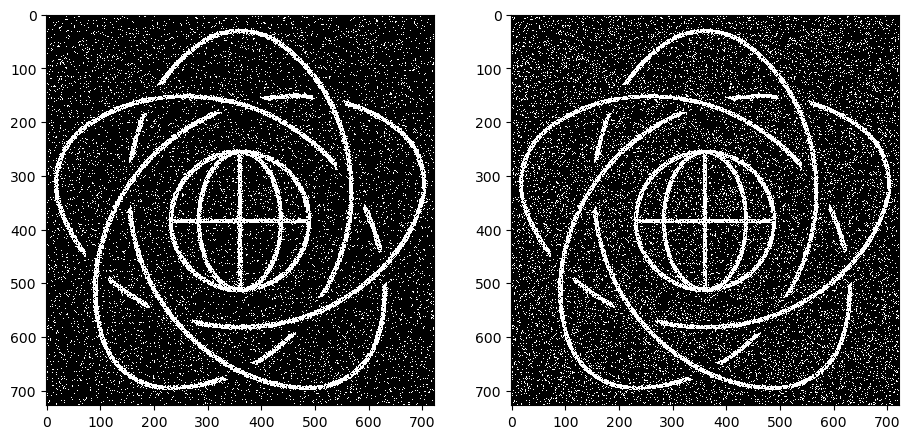

In [26]:
from IsingGridVaryingField import IsingGridVaryingField
avg = IsingDeNoise(noisy, 0.9)
avg[avg >= 0] = 1
avg[avg < 0] = -1
avg = avg.astype(np.int32)

fig, axes = plt.subplots(ncols=2, figsize=(11,6))
axes[0].imshow(avg, cmap=cm.gray, aspect="equal", interpolation="none", vmin=-1, vmax=1)
axes[1].imshow(noisy, cmap=cm.gray, aspect="equal", interpolation="none", vmin=-1, vmax=1)

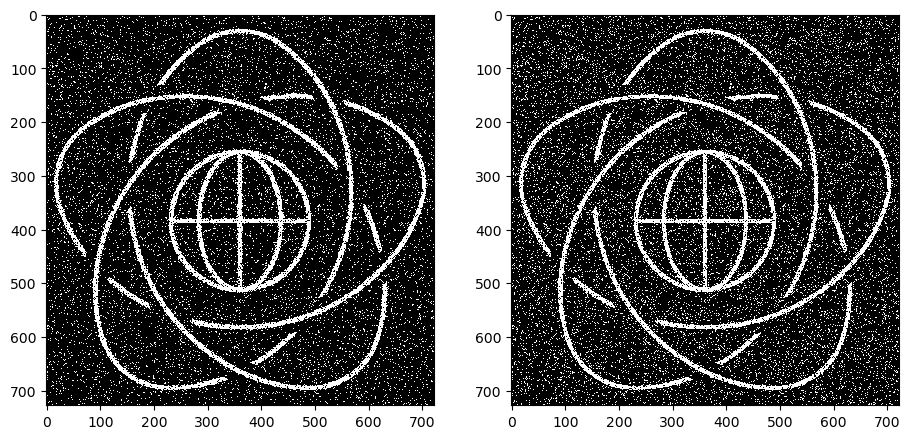

In [29]:
avg = IsingDeNoise(noisy, 0.99)
avg[avg >= 0] = 1
avg[avg < 0] = -1
avg = avg.astype(np.int32)

fig, axes = plt.subplots(ncols=2, figsize=(11,6))
axes[0].imshow(avg, cmap=cm.gray, aspect="equal", interpolation="none", vmin=-1, vmax=1)
axes[1].imshow(noisy, cmap=cm.gray, aspect="equal", interpolation="none", vmin=-1, vmax=1)

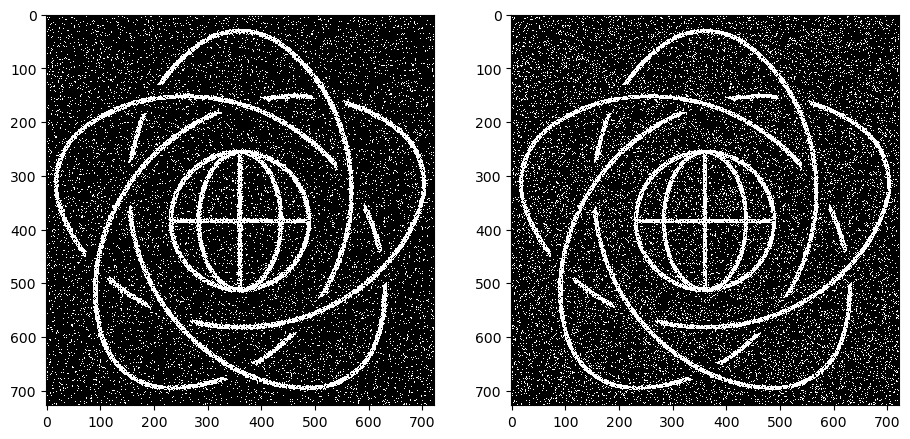

In [30]:
avg = IsingDeNoise(noisy, 0.5)
avg[avg >= 0] = 1
avg[avg < 0] = -1
avg = avg.astype(np.int32)

fig, axes = plt.subplots(ncols=2, figsize=(11,6))
axes[0].imshow(avg, cmap=cm.gray, aspect="equal", interpolation="none", vmin=-1, vmax=1)
axes[1].imshow(noisy, cmap=cm.gray, aspect="equal", interpolation="none", vmin=-1, vmax=1)